In [ ]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def load_dataset(csvfile):
    return pd.read_csv(csvfile)
dataset = load_dataset('googleplaystore.csv')
dataset.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [25]:
def print_summarize_dataset(dataset):
    print('The shape of dataset is', dataset.shape)
    print(dataset.describe(), '\n')
    print(dataset.head(), '\n')
    print(dataset.info())
print_summarize_dataset(dataset)

The shape of dataset is (10841, 13)
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000 

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M

In [28]:
def clean_dataset(df):
    filter = {'"': '', ',': '', ';': ' ', 'Everyone 10+': 'Everyone', 'Adults only 18+': 'Adults only', 'Mature 17+': 'Mature', 'Varies with device': 'NaN', 'Unrated': 'NaN', 'and up': ''}
    df.dropna(inplace=True)
    df.replace(filter, inplace=True, regex=True)
    df['Size'].replace({'M': '', 'K': ''}, inplace=True, regex=True)
    df['Reviews'] = df['Reviews'].astype(int)
    df['Content Rating'] = df['Content Rating'].str.replace('+', '')
    try:
        df['Installs'] = df['Installs'].str.replace('+', '').astype(int)
    except:
        df['Installs'] = df['Installs'].replace('+', '').astype(int)
    df['Last Updated'] = pd.to_datetime(df['Last Updated'])
    df['Rating'] = df['Rating'].astype(float)
    df.drop_duplicates(inplace=True)
    df.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)
    df['Popularity'] = df.Rating *10**7  * df.Reviews *10**2 * df.Installs
    # df.set_index(df.App, inplace=True)
    return df
dataset= clean_dataset(dataset)
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,2018-01-07,6.519000e+15
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design Pretend Play,2018-01-15,1.885650e+18
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,2.056485e+21
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,2018-06-08,4.851990e+22
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design Creativity,2018-06-20,4.158100e+17
...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0,Everyone,Education,2017-06-18,1.400000e+13
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0,Everyone,Education,2017-07-25,8.550000e+14
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,2018-07-06,2.000000e+12
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature,Books & Reference,2015-01-19,5.130000e+14


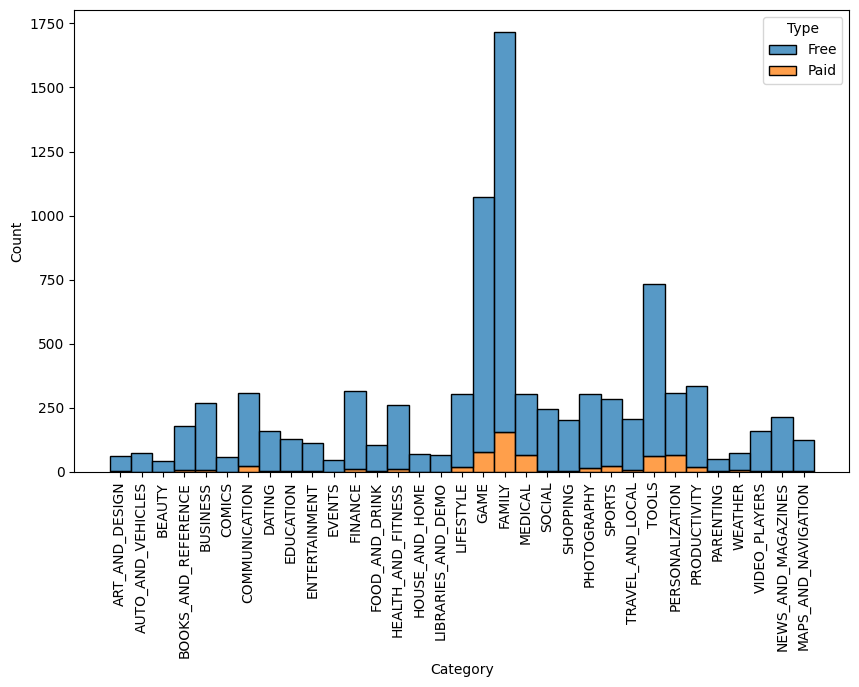

In [56]:
def print_histograms(dataset):
    df = dataset.Category.value_counts().head(20)
    # plt.figure(figsize=(15,6))
    # sns.barplot(x= df.index, y=df.values, legend='auto')
    # plt.xticks(rotation=80)
    # plt.show()

    
    # sns.histplot(data=dataset, x='Rating', hue='Type', multiple='stack', binwidth=0.3)
    # plt.show()
    plt.figure(figsize=(10,6))
    sns.histplot(data=dataset[['Reviews', 'Type']], x='Category', hue='Type', multiple='stack', color='orange', binwidth=.1)
    plt.xticks(rotation=90)
    plt.show()
print_histograms(dataset)

In [28]:
def print_scatter_matrix(dataset):
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=dataset)
    return plt.show()

In [ ]:
colors = ["Blue", "Red", "Green", "Yellow", "Purple", "Orange", "Pink", "Brown", "Gray", "Teal"]
def drove(criteria, dataset):
    art = dataset[(dataset['Category'] == criteria) & (dataset['Rating'] > 3)]
    sns.histplot(data=art.set_index('App'), x='Rating', color=colors[np.random.randint(0, len(colors))], bins=10)
    plt.xlabel('Rating')
    plt.title(f"The rating of applications in the {criteria} category is greater than 3 points!")
    plt.show()

def print_histograms(dataset):
    for category in dataset.Category:
        drove(category, dataset)
# print_histograms(dataset)